In [50]:
# Hypothesis Testing for beginners

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

In [3]:
df = pd.read_csv("../../DATA/Health_insurance.csv")

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 7)

In [6]:
print("Number of rows = {} and number of columns = {} in Insurance data frame".format(df.shape[0], df.shape[1]))

Number of rows = 1338 and number of columns = 7 in Insurance data frame


In [7]:
print("Data type of each attribute in Insurance data frame")

df.dtypes

Data type of each attribute in Insurance data frame


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
print("Number of missing values in Insurance data frame")

df.isnull().sum()

Number of missing values in Insurance data frame


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
print("Five point summary of numerical attributes")

df.describe().T

Five point summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df_attr = df.iloc[:, [0,2,6]]

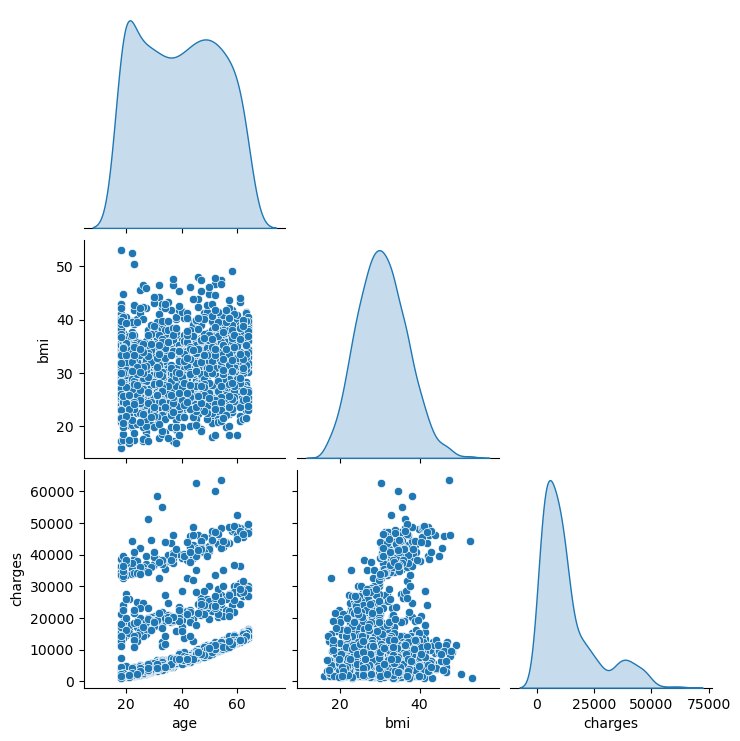

In [12]:
sns.pairplot(df_attr, diag_kind ="kde", corner = True)
plt.show()

In [13]:
print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:")

df_attr.skew(axis = 0, skipna = True)

Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

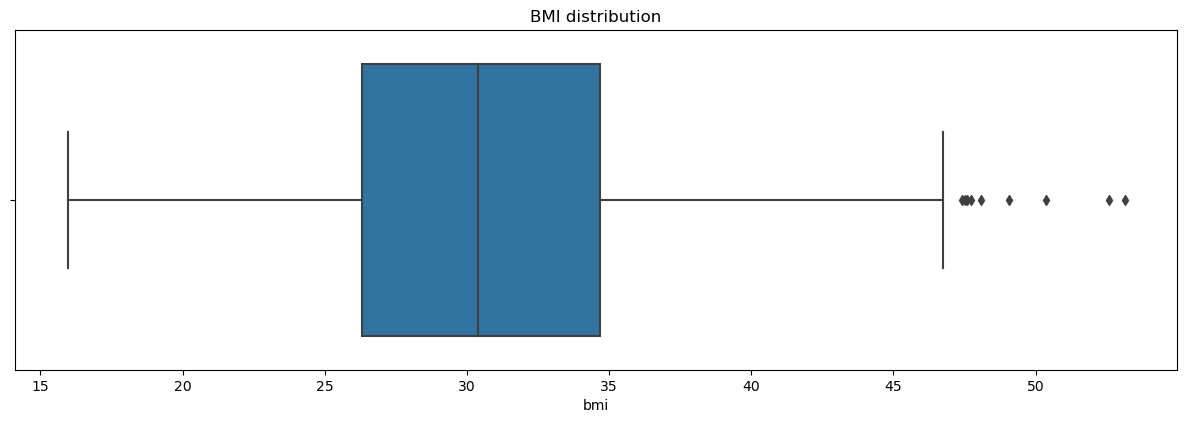

In [14]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

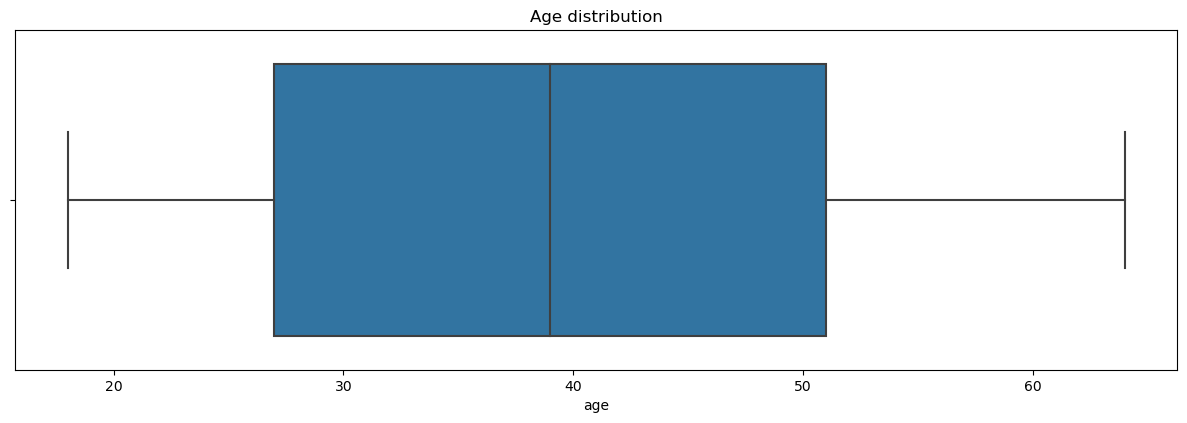

In [15]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

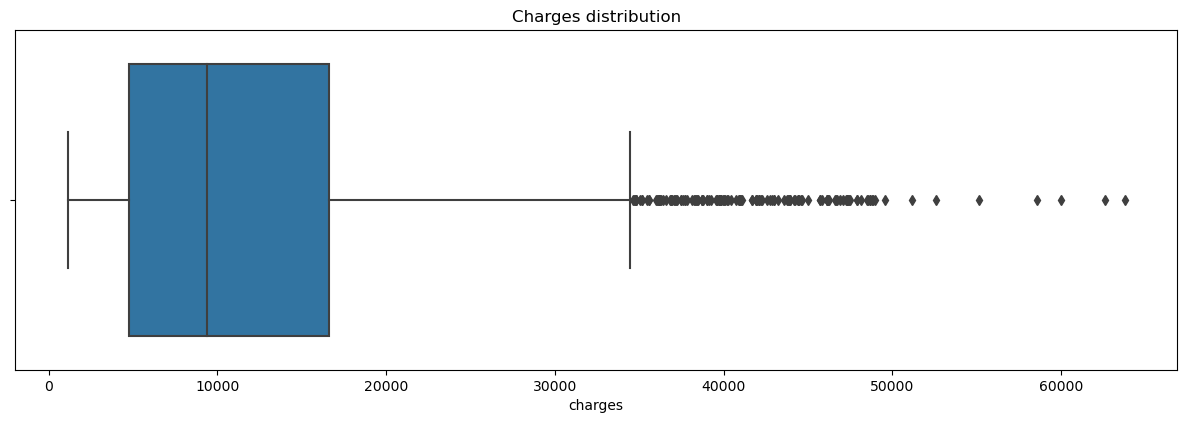

In [16]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


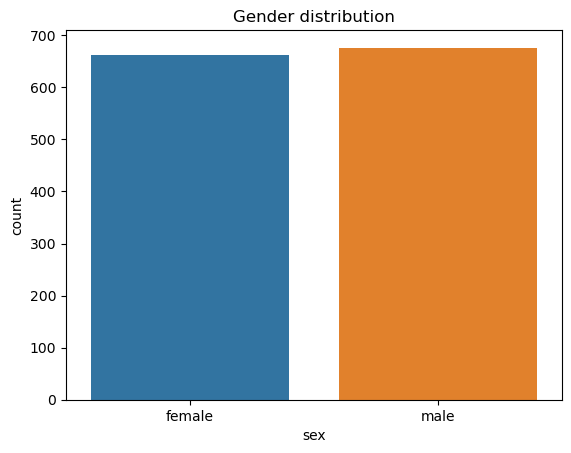

In [17]:
sns.countplot(df['sex']);
plt.title("Gender distribution");
plt.show();

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


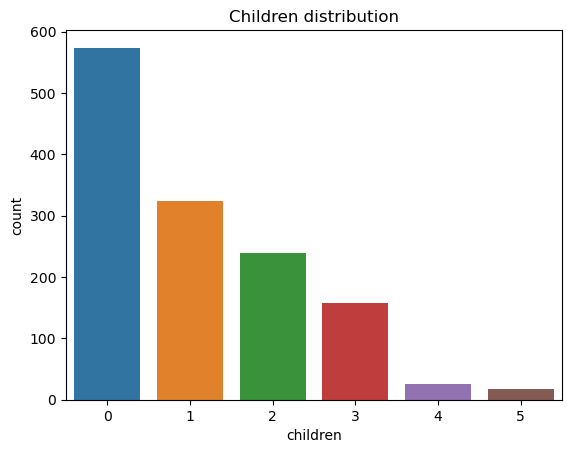

In [18]:
sns.countplot(df['children']);
plt.title("Children distribution");
plt.show();

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


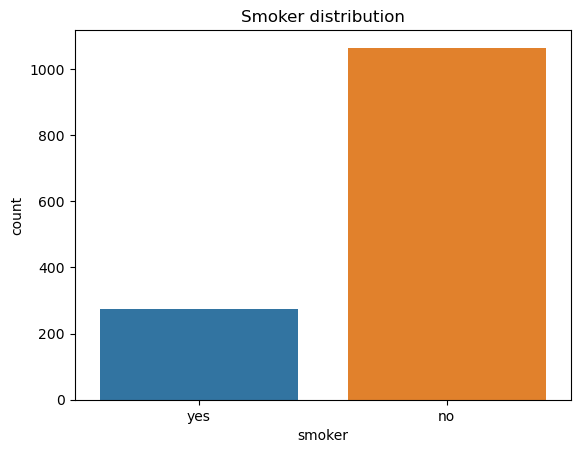

In [19]:
sns.countplot(df['smoker']);
plt.title("Smoker distribution");
plt.show();

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


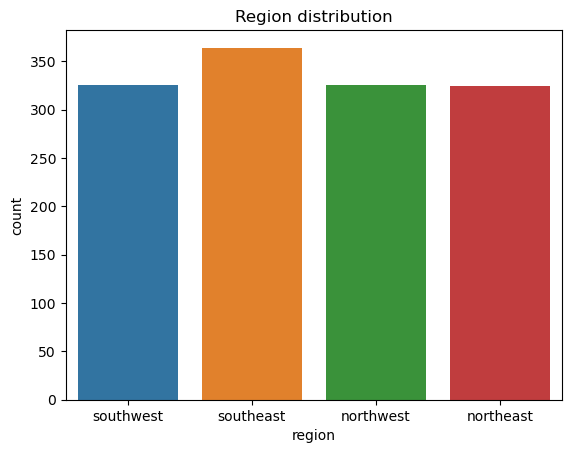

In [20]:
sns.countplot(df['region']);
plt.title("Region distribution");
plt.show();

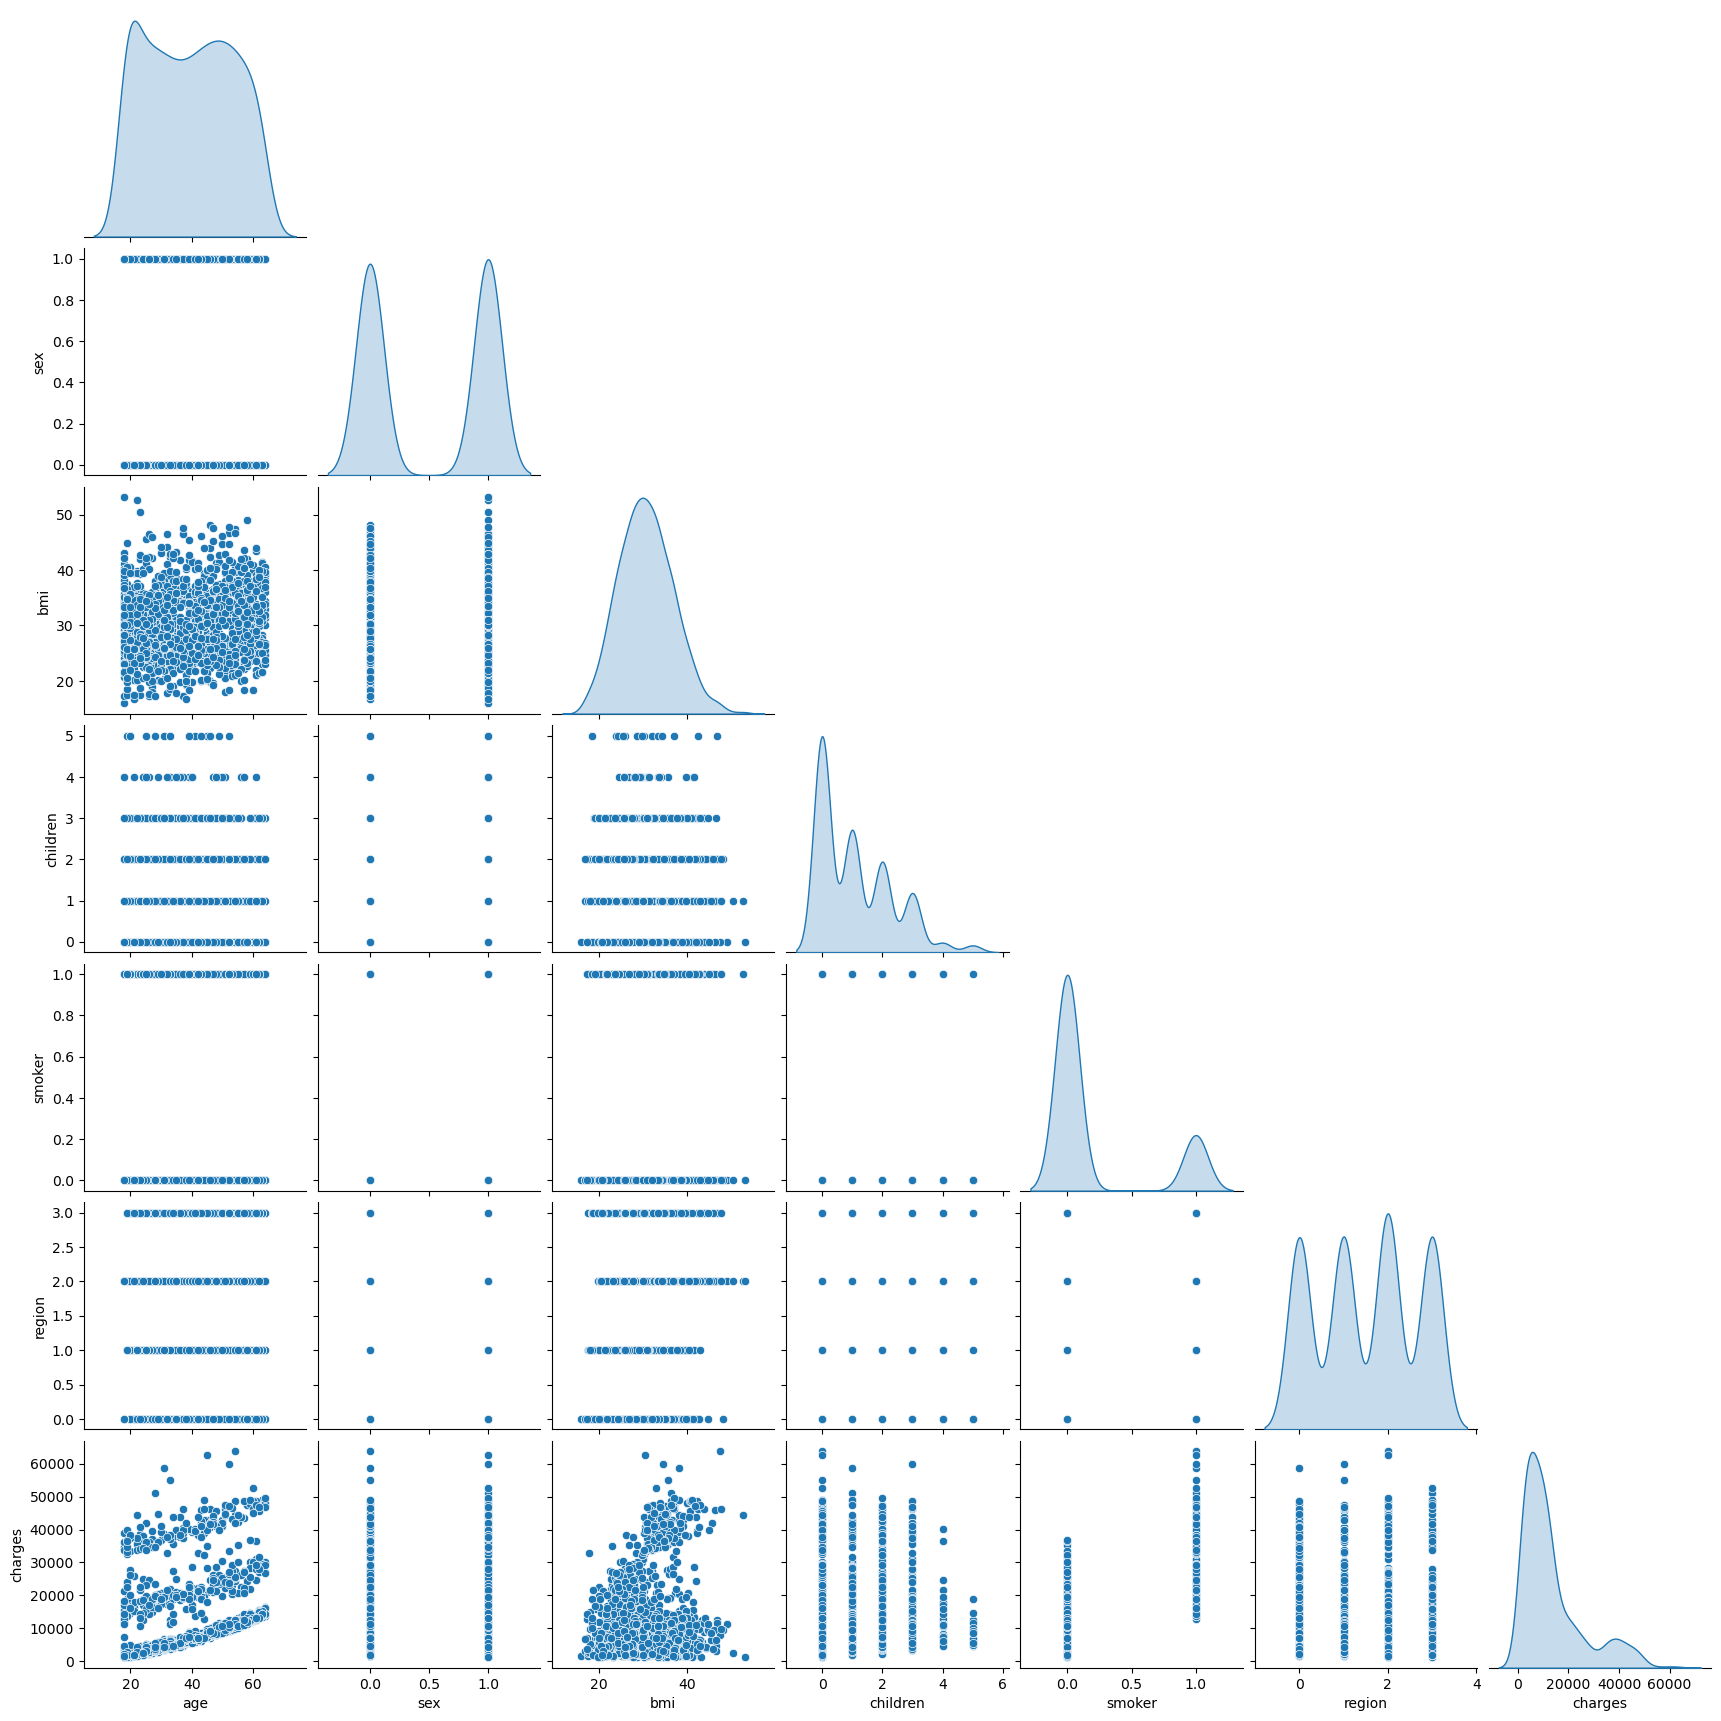

In [21]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded, diag_kind ="kde", corner = True)
plt.show()

In [22]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

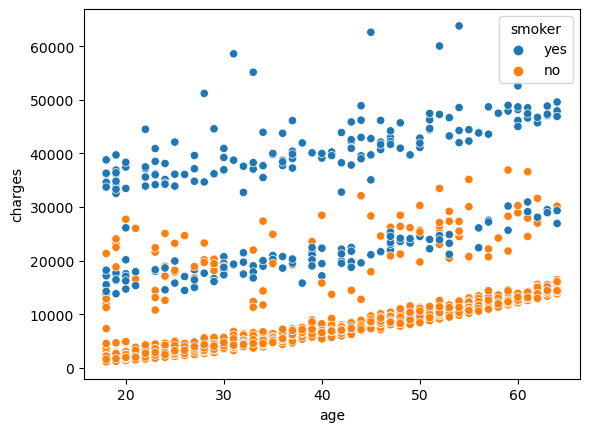

In [24]:
plt.show()

In [25]:
smoker_charges = df[df['smoker'] == 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 46.66492117272371
p_value = 8.271435842179102e-283


In [26]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


In [27]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

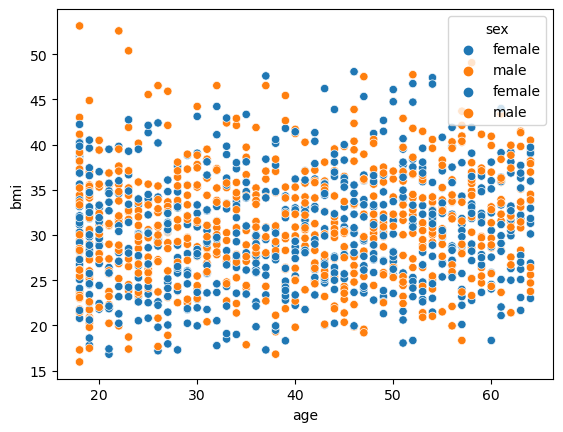

In [29]:
sns.scatterplot(x = 'age', y = 'bmi', hue = 'sex', data = df);
plt.show()

In [30]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932


In [31]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


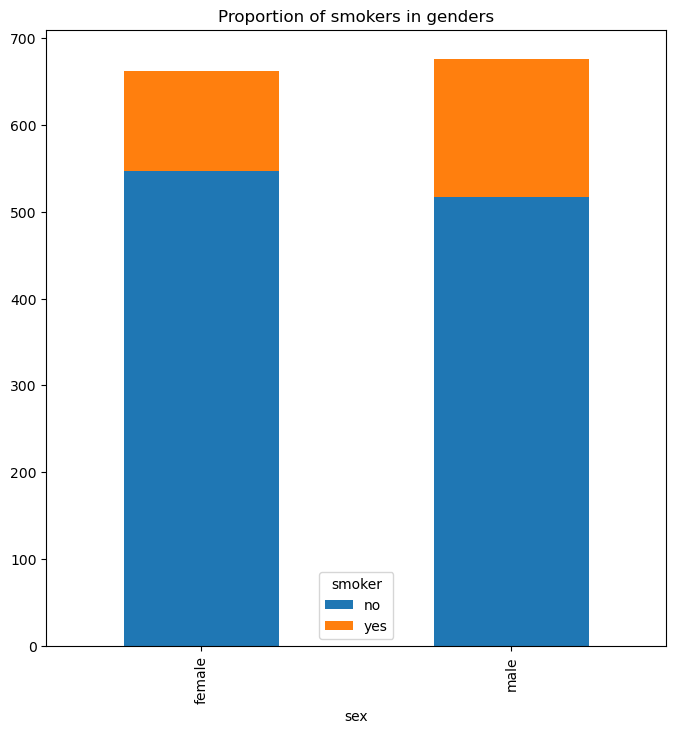

In [32]:
smoker_gender_table = pd.crosstab(index=df["sex"], columns=df["smoker"])

smoker_gender_table.plot(kind="bar", figsize=(8,8), stacked=True);
plt.title('Proportion of smokers in genders')
plt.show()

In [33]:
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]

n_males = df.sex.value_counts()[0]

n_females = df.sex.value_counts()[1]

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')


[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [34]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.005324114164320532


In [35]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


In [40]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [42]:
zero_child = df[df['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

In [43]:
one_child = df[df['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

In [44]:
two_child = df[df['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

In [46]:
children_bmi_df = pd.DataFrame()

df1 = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
df2 = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
df3 = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_df = children_bmi_df.append(df1) 
children_bmi_df = children_bmi_df.append(df2) 
children_bmi_df = children_bmi_df.append(df3)

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_4644\2397049031.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df1)
C:\Users\Shivraj\AppData\Local\Temp\ipykernel_4644\2397049031.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df2)
C:\Users\Shivraj\AppData\Local\Temp\ipykernel_4644\2397049031.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df3)


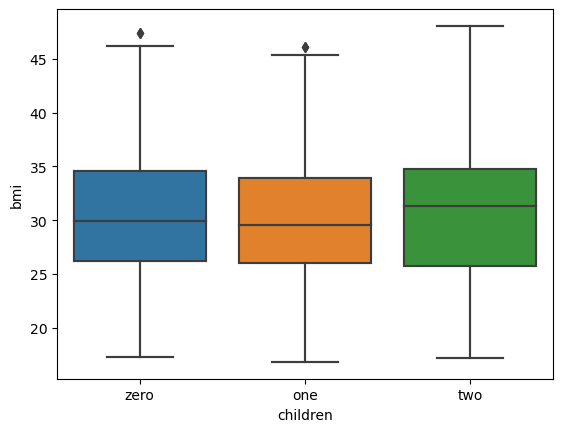

In [48]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_df);
plt.show()

In [49]:
mod = ols('bmi ~ children', data = children_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [51]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


In [54]:
# Hence we fail to reject Null Hypothesis (we have enough (95% and 99%) evidence to prove that women with no children, one child and two children has no effect on bmi)